# Lecture6. Logistic Regression Example

#### - 목차 -

* [Logistic Model Example](#Logistic-Model-Example)  
>[1. 필요한 패키지 설치](#1.-필요한-패키지-설치)  
>[2. 데이터 설명 및 로드](#2.-데이터-설명-및-로드)  
>[3. 데이터 전처리](#3.-데이터-전처리)  
>[4. train / test 데이터셋 나누기](#4.-train-/-test-데이터셋-나누기)  
>[5. 로지스틱 회귀 모델 구축](#5.-로지스틱-회귀-모델-구축)  
>[6. 예측 정확도 확인](#6.-예측-정확도-확인)  

* [Simple Linear Regression Example](#Simple-Linear-Regression-Example)   
>[1. 필요한 패키지 설치](#1.-필요한-패키지-설치)  
>[2. 데이터 설명 및 로드](#2.-데이터-설명-및-로드)   
>[3. train / test 데이터셋 나누기](#3.-train-/-test-데이터셋-나누기)  
>[4. 단순 선형 회귀 모델 구축](#4.-단순-선형-회귀-모델-구축)  
>[5. 예측 정확도 확인](#5.-예측-정확도-확인)  

* [Multiple Linear Regression Example](#Multiple-Linear-Regression-Example)   
>[1. 필요한 패키지 설치](#1.-필요한-패키지-설치)  
>[2. 데이터 설명 및 로드](#2.-데이터-설명-및-로드)  
>[3. 데이터 전처리](#3.-데이터-전처리)  
>[4. train / test 데이터셋 나누기](#4.-train-/-test-데이터셋-나누기)  
>[5. 선형회귀 모델 구축](#5.-선형회귀-모델-구축)  
>[6. 예측 정확도 확인](#6.-예측-정확도-확인)  

* [변수 선택법](#변수-선택법)   

# Logistic Model Example

### 1. 필요한 패키지 설치

In [247]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

### 2. 데이터 설명 및 로드

In [248]:
user_df = pd.read_csv('telecom_users.csv', header=0)
user_df = user_df.dropna()
user_df=user_df.drop( 'customerID', axis=1)

print(user_df.shape)
print(list(user_df.columns))

(5986, 20)
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [249]:
user_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


### 3. 데이터 전처리

In [250]:
user_df['gender'] = user_df['gender'].map({'Female': 0, 'Male': 1})
user_df['Partner'] = user_df['Partner'].map({'No': 0, 'Yes': 1})
user_df['Dependents'] = user_df['Dependents'].map({'No': 0, 'Yes': 1})
user_df['PhoneService'] = user_df['PhoneService'].map({'No': 0, 'Yes': 1})
user_df['PaperlessBilling'] = user_df['PaperlessBilling'].map({'No': 0, 'Yes': 1})
user_df['Churn'] = user_df['Churn'].map({'No': 0, 'Yes': 1})

user_df['MultipleLines'] = user_df['MultipleLines'].map({'No': 0, 'Yes': 1, 'No phone service': 2})
user_df['InternetService'] = user_df['InternetService'].map({'No': 0, 'Fiber optic': 1, 'DSL': 2})
user_df['OnlineSecurity'] = user_df['OnlineSecurity'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
user_df['OnlineBackup'] = user_df['OnlineBackup'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
user_df['DeviceProtection'] = user_df['DeviceProtection'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
user_df['TechSupport'] = user_df['TechSupport'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
user_df['StreamingTV'] = user_df['StreamingTV'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
user_df['StreamingMovies'] = user_df['StreamingMovies'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
user_df['Contract'] = user_df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
user_df['PaymentMethod'] = user_df['PaymentMethod'].map({'Credit card (automatic)': 0, 'Bank transfer (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3})

user_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,1,0,2,2,2,2,2,2,2,0,0,24.10,1734.65,0
1,0,0,0,0,44,1,0,1,0,1,1,0,1,0,0,1,0,88.15,3973.2,0
2,0,1,1,0,38,1,1,1,0,0,0,0,0,0,0,1,1,74.95,2869.85,1
3,1,0,0,0,4,1,0,2,0,0,0,0,0,1,0,1,2,55.90,238.5,0
4,1,0,0,0,2,1,0,2,1,0,1,0,0,0,0,0,2,53.45,119.5,0


In [251]:
#결측값 처리

user_df['TotalCharges']=user_df.fillna(0)

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'Partner'}>,
        <AxesSubplot:title={'center':'Dependents'}>],
       [<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'PhoneService'}>,
        <AxesSubplot:title={'center':'MultipleLines'}>,
        <AxesSubplot:title={'center':'InternetService'}>],
       [<AxesSubplot:title={'center':'OnlineSecurity'}>,
        <AxesSubplot:title={'center':'OnlineBackup'}>,
        <AxesSubplot:title={'center':'DeviceProtection'}>,
        <AxesSubplot:title={'center':'TechSupport'}>],
       [<AxesSubplot:title={'center':'StreamingTV'}>,
        <AxesSubplot:title={'center':'StreamingMovies'}>,
        <AxesSubplot:title={'center':'Contract'}>,
        <AxesSubplot:title={'center':'PaperlessBilling'}>],
       [<AxesSubplot:title={'center':'PaymentMethod'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>,
        <A

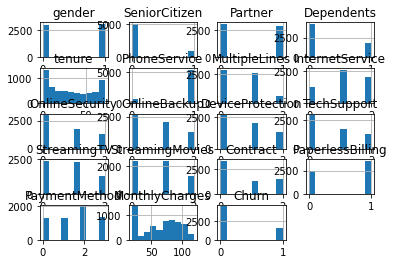

In [252]:
user_df.hist()

In [253]:
#독립변수와 종속변수 지정

features1 = user_df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
target1 = user_df['Churn']

### 4. train / test 데이터셋 나누기

In [254]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features1, target1, test_size=0.3)

### 5. 로지스틱 회귀 모델 구축

In [255]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

print(x_train.shape)
print(x_test.shape)

(4190, 19)
(1796, 19)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 6. 예측 정확도 확인

In [256]:
#train 데이터셋의 예측 정확도
print(model.score(x_train, y_train))

0.8052505966587112


In [257]:
#test 데이터셋의 예측 정확도
print(model.score(x_test, y_test))

0.7956570155902004


# Simple Linear Regression Example

### 1. 필요한 패키지 설치

In [259]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

### 2. 데이터 설명 및 로드

In [260]:
salary_df = pd.read_csv('Salary_Data.csv', header=0)
salary_df = salary_df.dropna()

print(salary_df.shape)
print(list(salary_df.columns))

(30, 2)
['Age', 'Salary']


In [261]:
salary_df.head()

,Age,Salary
0,21.0,39343
1,21.5,46205
2,21.7,37731
3,22.0,43525
4,22.2,39891


In [262]:
#독립변수와 종속변수 지정

features2 = salary_df[['Age']]
target2 = salary_df['Salary']

### 3. train / test 데이터셋 나누기

In [263]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(features2, target2, test_size=0.3, random_state=0)

### 4. 단순 선형 회귀 모델 구축

In [264]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train1, y_train1)

LinearRegression()

### 5. 예측 정확도 확인

In [265]:
# train 데이터셋 예측 정확도
print(model.score(X_train1, y_train1))

0.9393099830738363


In [266]:
#test 데이터셋 예측 정확도
print(model.score(X_test1, y_test1))

0.9579539899937212


# Multiple Linear Regression Example

### 1. 필요한 패키지 설치

In [267]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

### 2. 데이터 설명 및 로드

In [268]:
#데이터에는 날씨 정보 (온도, 습도, 풍속, 가시성, 이슬점, 일사량, 강설량, 강우), 시간당 대여 한 자전거 수 및 날짜 정보가 포함됨.
#대기 조건이 대여 자전거 수에 미치는 영향 예측하기

bike_df = pd.read_csv('SeoulBikeData.csv', header=0)
bike_df = bike_df.dropna()
bike_df=bike_df.drop( 'Date', axis=1)

print(bike_df.shape)
print(list(bike_df.columns))

(8760, 13)
['RentedBikeCount', 'Hour', 'Temperature', 'Humidity(%)', 'Windspeed (m/s)', 'Visibility(10m)', 'Dewpointtemperature', 'SolarRadiation(MJ/m2)', 'Rainfall(mm)', 'Snowfall(cm)', 'Seasons', 'Holiday', 'FunctioningDay']


In [269]:
bike_df.head()

,RentedBikeCount,Hour,Temperature,Humidity(%),Windspeed (m/s),Visibility(10m),Dewpointtemperature,SolarRadiation(MJ/m2),Rainfall(mm),Snowfall(cm),Seasons,Holiday,FunctioningDay
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### 3. 데이터 전처리

In [270]:
bike_df['Seasons'] = bike_df['Seasons'].map({'Spring': 0, 'Summer': 1, 'Autumn': 2, 'Winter': 3})
bike_df['Holiday'] = bike_df['Holiday'].map({'No Holiday': 0, 'Holiday': 1})
bike_df['FunctioningDay'] = bike_df['FunctioningDay'].map({'No': 0, 'Yes': 1})

array([[<AxesSubplot:title={'center':'RentedBikeCount'}>,
        <AxesSubplot:title={'center':'Hour'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Humidity(%)'}>],
       [<AxesSubplot:title={'center':'Windspeed (m/s)'}>,
        <AxesSubplot:title={'center':'Visibility(10m)'}>,
        <AxesSubplot:title={'center':'Dewpointtemperature'}>,
        <AxesSubplot:title={'center':'SolarRadiation(MJ/m2)'}>],
       [<AxesSubplot:title={'center':'Rainfall(mm)'}>,
        <AxesSubplot:title={'center':'Snowfall(cm)'}>,
        <AxesSubplot:title={'center':'Seasons'}>,
        <AxesSubplot:title={'center':'Holiday'}>],
       [<AxesSubplot:title={'center':'FunctioningDay'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

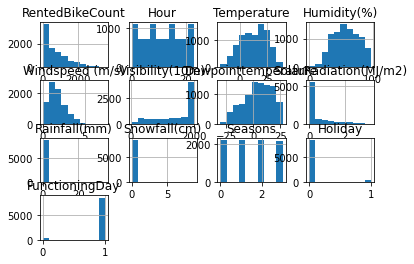

In [271]:
bike_df.hist()

In [272]:
#독립변수와 종속변수 지정

features = bike_df[['Hour', 'Temperature', 'Humidity(%)', 'Windspeed (m/s)','Visibility(10m)', 'Dewpointtemperature', 'SolarRadiation(MJ/m2)','Rainfall(mm)','Snowfall(cm)', 'Seasons', 'Holiday', 'FunctioningDay']]
target = bike_df['RentedBikeCount']

### 4. train / test 데이터셋 나누기

In [273]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(6132, 12)
(2628, 12)


### 5. 선형회귀 모델 구축

In [274]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

### 6. 예측 정확도 확인

In [275]:
# train 데이터셋 예측 정확도
print(model.score(X_train, Y_train))

0.5328961295995032


In [276]:
#test 데이터셋 예측 정확도
print(model.score(X_test, Y_test))

0.5082974344056312


In [277]:
print(model.coef_)

[ 2.72166596e+01  2.25865700e+01 -1.00275121e+01  1.04071267e+01
  3.08401460e-02  8.95868235e+00 -8.11933276e+01 -5.26980843e+01
  1.99482841e+01 -2.67267091e+01 -1.36180283e+02  8.09683342e+02]


### 변수 선택법

In [278]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

def select_features(train_features, train_labels, test_features):
   # configure to select all features
   fs = SelectKBest(score_func=mutual_info_regression, k='all')
   # learn relationship from training data
   fs.fit(train_features, train_labels)
   # transform train input data
   X_train_fs = fs.transform(train_features)
   # transform test input data
   X_test_fs = fs.transform(test_features)
   return X_train_fs, X_test_fs, fs

In [279]:
X_train_fs, X_test_fs, fs = select_features(train_features, train_labels, test_features)
# what are scores for the features
for i in range(len(fs.scores_)):
   print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.000000
Feature 1: 0.005422
Feature 2: 0.011224
Feature 3: 0.013607
Feature 4: 0.088982
Feature 5: 0.009151
Feature 6: 0.000000
Feature 7: 0.020230
Feature 8: 0.065592
Feature 9: 0.024848
Feature 10: 0.027172
Feature 11: 0.052215
Feature 12: 0.022476
Feature 13: 0.017186
Feature 14: 0.090938
Feature 15: 0.038467
Feature 16: 0.014308
Feature 17: 0.037498
Feature 18: 0.000000


In [280]:
# target(Price)와 가장 correlated 된 features 를 k개 고르기..
from sklearn.feature_selection import f_regression, SelectKBest

selector = SelectKBest(score_func=f_regression, k=10) ## selctor 정의하기

X_train_selected = selector.fit_transform(X_train, Y_train) ## 학습데이터에 fit_transform 
X_test_selected = selector.transform(X_test) ## 테스트 데이터는 transform

X_train_selected.shape, X_test_selected.shape

((6132, 10), (2628, 10))

In [281]:
#선택된 변수, 선택되지 않은 변수 확인

all_names = X_train.columns

selected_mask = selector.get_support()

selected_names = all_names[selected_mask] ## 선택된 변수들
unselected_names = all_names[~selected_mask] ## 선택되지 않은 변수들

print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['Hour', 'Temperature', 'Humidity(%)', 'Windspeed (m/s)',
       'Visibility(10m)', 'Dewpointtemperature', 'SolarRadiation(MJ/m2)',
       'Snowfall(cm)', 'Seasons', 'FunctioningDay'],
      dtype='object')
Unselected names:  Index(['Rainfall(mm)', 'Holiday'], dtype='object')


In [282]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_selected, Y_train)

LinearRegression()

In [283]:
#변수 선택 후 train 데이터셋의 예측 정확도
print(model.score(X_train_selected, Y_train))

0.5217931775714986


In [284]:
#변수 선택 후 test 데이터셋의 예측 정확도
print(model.score(X_test_selected, Y_test))

0.4949873490604628
